<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:250%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b> Exercise no. 5  </b></p>
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> |</span></b> Table of Contents</b></p>
</div>

1. [subplots](#1)
2. [ylim & xlim](#2)
3. [One Hot Encoding.](#3)
4. [OS Library and Basic Exam Preparation](#4)

In [1]:
import pandas as pd
import seaborn as sns  # for creating the graphs
import matplotlib.pyplot as plt  #for reshaping graph size
import numpy as np
import random

In [2]:
# Creating a first DataFrame with the relative distribution of scores in the center and an average of 75
np.random.seed(0)
num_students = 80
grades = np.random.randint(60, 90, num_students)  # grade range 60-89
student_ids = range(1, num_students + 1)
names = ['Student ' + str(i) for i in range(1, num_students + 1)]
df1 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})

# Creating a second DataFrame with the distribution of scores at the edges and an average of 75
np.random.seed(1)
grades_low = np.random.randint(40, 60, num_students // 2)  # grade range  40-59
grades_high = np.random.randint(90, 100, num_students // 2)  # grade range  90-99
grades = np.concatenate((grades_low, grades_high))
random.shuffle(grades)  # shuffle grades
df2 = pd.DataFrame({'ID': student_ids, 'Name': names, 'Grade': grades})



#### 1.1 Display side-by-side box plots for df1 and df2 depicting their distributions with appropriate titles for each graph.

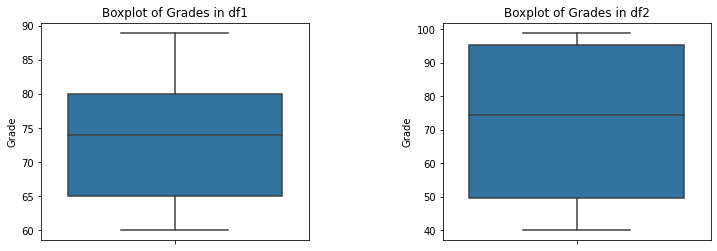

In [3]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.boxplot(data = df1,y = 'Grade', ax = ax[0])
ax[0].set_title('Boxplot of Grades in df1')

sns.boxplot(data = df2,y = 'Grade', ax = ax[1])
ax[1].set_title('Boxplot of Grades in df2')

plt.show()

#### 1.2 Do the plots appear similar when placed next to each other? Suggest a better way to visualize the plots.

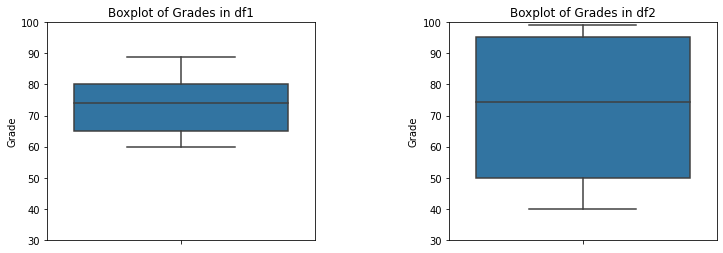

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.boxplot(data = df1,y = 'Grade', ax = ax[0])
ax[0].set_title('Boxplot of Grades in df1')

sns.boxplot(data = df2,y = 'Grade', ax = ax[1])
ax[1].set_title('Boxplot of Grades in df2')

ax[0].set_ylim([30, 100])
ax[1].set_ylim([30, 100])

plt.show()


#### 1.3 Create a histogram that will be displayed next to each other, note that you can learn a lot from this histogram.

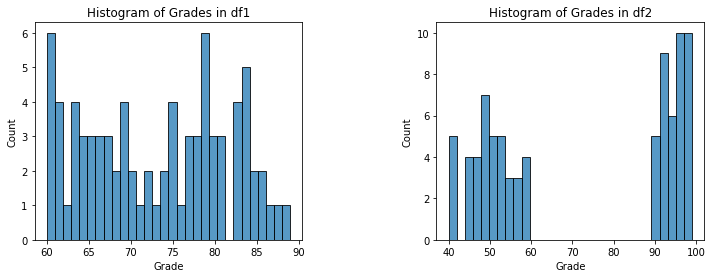

In [5]:
fig, ax = plt.subplots(1,2, figsize = (12,4))
plt.subplots_adjust(wspace = 0.5)

# Create histograms for the 'Grade' column in df1 and df2 with titles
sns.histplot(data = df1, x = 'Grade', ax = ax[0], bins=30)
ax[0].set_title('Histogram of Grades in df1')

sns.histplot(data = df2, x = 'Grade', ax = ax[1], bins=30)
ax[1].set_title('Histogram of Grades in df2')

plt.show()

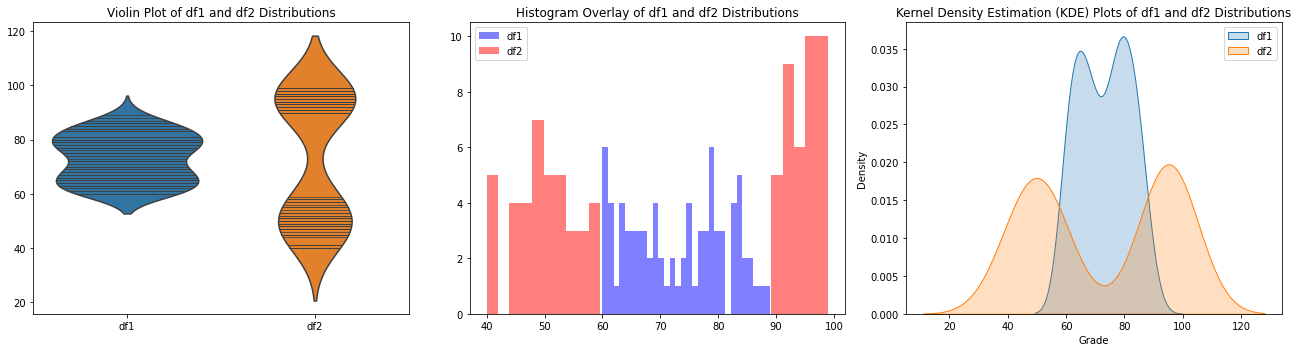

In [7]:
# Create Violin Plot
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.violinplot(data=[df1['Grade'], df2['Grade']], inner="stick")
plt.xticks([0, 1], ["df1", "df2"])
plt.title("Violin Plot of df1 and df2 Distributions")

# Create Histogram Overlay
plt.subplot(1, 3, 2)
plt.hist(df1['Grade'], bins=30, alpha=0.5, label='df1', color='blue')
plt.hist(df2['Grade'], bins=30, alpha=0.5, label='df2', color='red')
plt.legend()
plt.title("Histogram Overlay of df1 and df2 Distributions")

# Create KDE plot
plt.subplot(1, 3, 3)
sns.kdeplot(df1['Grade'], label='df1', shade=True)
sns.kdeplot(df2['Grade'], label='df2', shade=True)
plt.legend()
plt.title("Kernel Density Estimation (KDE) Plots of df1 and df2 Distributions")

plt.tight_layout()
plt.show();

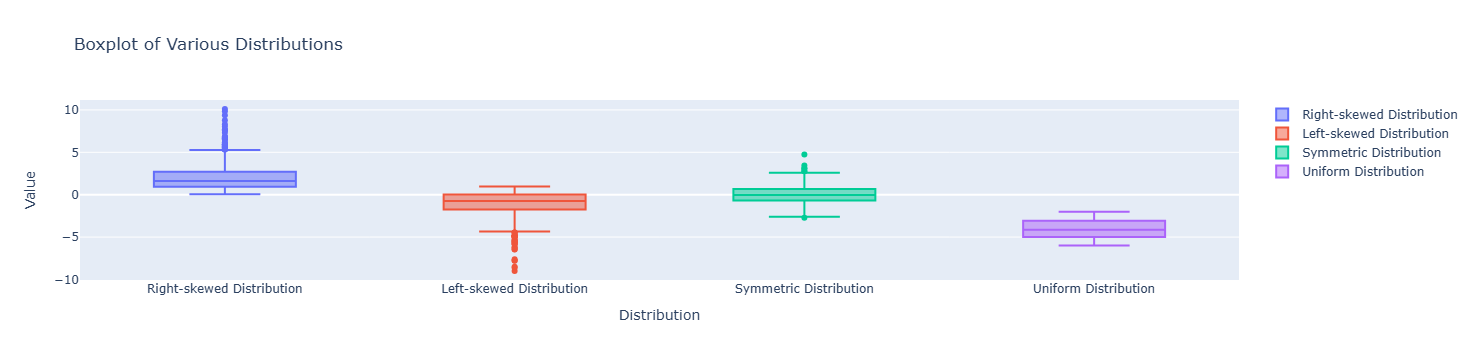

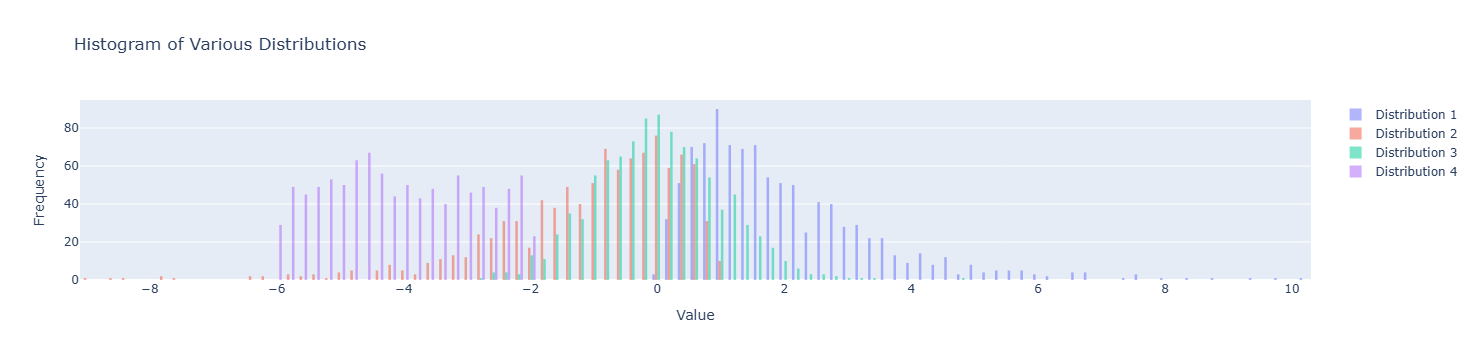

In [9]:
import numpy as np
import plotly.graph_objects as go

# Create data for each distribution
data1 = np.random.gamma(2, 1, 1000)  # Right-skewed Distribution
data2 = (1- np.random.gamma(2, 1, 1000))  # Left-skewed Distribution
data3 = np.random.standard_normal(1000)  # Symmetric Distribution
data4 = np.random.uniform(-6, -2, 1000)  # Uniform Distribution

# יצירת רשימה של הנתונים לתיבת ויסורט
data_to_plot = [data1, data2, data3, data4]

# יצירת תיבת ויסורט
fig_box = go.Figure()

# הוספת תיבת ויסורט לאיור
fig_box.add_trace(go.Box(y=data1, name='Right-skewed Distribution'))
fig_box.add_trace(go.Box(y=data2, name='Left-skewed Distribution'))
fig_box.add_trace(go.Box(y=data3, name='Symmetric Distribution'))
fig_box.add_trace(go.Box(y=data4, name='Uniform Distribution'))

# עיצוב תיבת הויסורט
fig_box.update_layout(title='Boxplot of Various Distributions',
                      yaxis_title='Value',
                      xaxis_title='Distribution')

# הצגת תיבת הויסורט
fig_box.show()

# יצירת היסטוגרמה
fig_hist = go.Figure()

# הוספת היסטוגרמה
for i, data in enumerate(data_to_plot):
    fig_hist.add_trace(go.Histogram(x=data, name=f'Distribution {i+1}', opacity=0.5))

# עיצוב היסטוגרמה
fig_hist.update_layout(title='Histogram of Various Distributions',
                       xaxis_title='Value',
                       yaxis_title='Frequency')

# הצגת היסטוגרמה
fig_hist.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> |</span></b> One Hot Encoding.</b></p>
</div>

In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [44]:
df = pd.read_csv("OneHotEncodingData.csv")

In [46]:
df.head()

,Id,Colour,Country
0,1,Red,USA
1,2,Blue,UK
2,3,Green,Canada
3,4,Blue,USA
4,5,Blue,USA


In [47]:
df.tail()

,Id,Colour,Country
295,296,Red,Canada
296,297,Green,UK
297,298,Green,UK
298,299,Red,Canada
299,300,Red,Canada


In [48]:
df.dtypes

Id          int64
Colour     object
Country    object
dtype: object

In [16]:
df["Colour"].unique()

array(['Red', 'Blue', 'Green'], dtype=object)

In [17]:
df["Country"].unique()

array(['USA', 'UK', 'Canada'], dtype=object)

In [20]:
ohe = OneHotEncoder()

In [21]:
print(ohe)

OneHotEncoder()


In [22]:
ohe.fit_transform(df[["Colour", "Country"]]).toarray()

array([[0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0.]])

In [24]:
df

,Id,Colour,Country
0,1,Red,USA
1,2,Blue,UK
2,3,Green,Canada
3,4,Blue,USA
4,5,Blue,USA
...,...,...,...
295,296,Red,Canada
296,297,Green,UK
297,298,Green,UK
298,299,Red,Canada


In [11]:
feature_arry = ohe.fit_transform(df[["Colour", "Country"]]).toarray()

In [12]:
print(feature_arry)

[[0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]]


In [13]:
ohe.categories_

[array(['Blue', 'Green', 'Red'], dtype=object),
 array(['Canada', 'UK', 'USA'], dtype=object)]

In [14]:
feature_labels = ohe.categories_

In [15]:
np.array(feature_labels).ravel()

array(['Blue', 'Green', 'Red', 'Canada', 'UK', 'USA'], dtype=object)

In [16]:
feature_labels = np.array(feature_labels).ravel()

In [17]:
print(feature_labels)

['Blue' 'Green' 'Red' 'Canada' 'UK' 'USA']


In [18]:
pd.DataFrame(feature_arry, columns = feature_labels)

,Blue,Green,Red,Canada,UK,USA
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
295,0.0,0.0,1.0,1.0,0.0,0.0
296,0.0,1.0,0.0,0.0,1.0,0.0
297,0.0,1.0,0.0,0.0,1.0,0.0
298,0.0,0.0,1.0,1.0,0.0,0.0


In [19]:
features = pd.DataFrame(feature_arry, columns = feature_labels)

In [20]:
print(features)

     Blue  Green  Red  Canada   UK  USA
0     0.0    0.0  1.0     0.0  0.0  1.0
1     1.0    0.0  0.0     0.0  1.0  0.0
2     0.0    1.0  0.0     1.0  0.0  0.0
3     1.0    0.0  0.0     0.0  0.0  1.0
4     1.0    0.0  0.0     0.0  0.0  1.0
..    ...    ...  ...     ...  ...  ...
295   0.0    0.0  1.0     1.0  0.0  0.0
296   0.0    1.0  0.0     0.0  1.0  0.0
297   0.0    1.0  0.0     0.0  1.0  0.0
298   0.0    0.0  1.0     1.0  0.0  0.0
299   0.0    0.0  1.0     1.0  0.0  0.0

[300 rows x 6 columns]


In [21]:
features.head()

,Blue,Green,Red,Canada,UK,USA
0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [22]:
pd.concat([df, features], axis=1)

,Id,Colour,Country,Blue,Green,Red,Canada,UK,USA
0,1,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Blue,UK,1.0,0.0,0.0,0.0,1.0,0.0
2,3,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0
3,4,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0
4,5,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
295,296,Red,Canada,0.0,0.0,1.0,1.0,0.0,0.0
296,297,Green,UK,0.0,1.0,0.0,0.0,1.0,0.0
297,298,Green,UK,0.0,1.0,0.0,0.0,1.0,0.0
298,299,Red,Canada,0.0,0.0,1.0,1.0,0.0,0.0


In [23]:
df_new = pd.concat([df, features], axis=1)

In [24]:
df_new.head()

,Id,Colour,Country,Blue,Green,Red,Canada,UK,USA
0,1,Red,USA,0.0,0.0,1.0,0.0,0.0,1.0
1,2,Blue,UK,1.0,0.0,0.0,0.0,1.0,0.0
2,3,Green,Canada,0.0,1.0,0.0,1.0,0.0,0.0
3,4,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0
4,5,Blue,USA,1.0,0.0,0.0,0.0,0.0,1.0


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:200%; 
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;text-align: center;color:white; border-radius: 20px; padding-top: 20px; padding-bottom: 20px;"><b><b><span style='color:#2ae4f5''></span></b>  The OS Library and Basic Exam Preparation  </b></p>
</div>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> |</span></b> Table of Contents</b></p>
</div>

1. [**The OS Library**](#section1)
2. [**Exam Preparation**](#section2)
---

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> 1 |</span></b> OS Library</b></p>
</div>

The `os` library in Python allows interaction with the operating system, such as managing files and directories, accessing environment variables, and executing system commands.


In [11]:
import os

#### Verify working directory path:

In [12]:
os.getcwd()

'C:\\Users\\razel\\Desktop\\אריאל\\data-analytics\\\u200f\u200fMy Lectures Sem B 24\\tirgul4\\Tigul4'

**We can get the list of directoris in active folder:**

In [13]:
os.listdir()

['.ipynb_checkpoints',
 'Ex4.ipynb',
 'Ex4_student.ipynb',
 'OS_and_EXAMprep.ipynb',
 'titanic.csv']

**Create directory**

The command `os.makedirs('tempDir', exist_ok=True)` performs the following:

- **Creates a directory named `tempDir`**: If the directory does not already exist, it will be created.
- **Allows nested directories**: If the specified path includes multiple levels of directories (e.g., `parentDir/tempDir`), it creates all the required directories in the path.
- **Avoids errors if the directory already exists**: The parameter `exist_ok=True` prevents raising an error if the directory already exists. Without this parameter, Python would raise a `FileExistsError`.

This is particularly useful for ensuring that a directory structure is in place without worrying about its prior existence.


#### Change the current working directory:

> './' stands for current relative path

#### Reading data by url.

In [6]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Razelbaz1/exercises-package/master/data/titanic.csv'
titanic_df = pd.read_csv(url ,encoding='latin1')

Read more about `encoding` [here.](#https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

#### Reading a file from the computer: Direct name.

In [7]:
csv_name = 'titanic.csv'
titanic_df = pd.read_csv(csv_name ,encoding='latin1')

#### Reading a file from the computer: Via path.

> Navigate to your file **>** Right click on your file **>** Copy path **>** paste as is in new var.

In [9]:
path = r'C:\Users\razel\Desktop\אריאל\data-analytics\‏‏My Lectures Sem B 24\tirgul2\titanic.csv' 
titanic_df = pd.read_csv(path ,encoding='latin1')

> Add **r** in your path: **r**'path\to\file' If your path includes non-English characters.
>
> **or alternatively**

In [15]:
path = 'C:\\Users\\razel\\Desktop\\אריאל\\data-analytics\\‏‏My Lectures Sem B 24\\tirgul2\\titanic.csv' 
titanic_df = pd.read_csv(path ,encoding='latin1')
print()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2ae4f5''> 2 |</span></b> Exam Preparation</b></p>
</div>

<div dir="rtl">

###### ### ✅ מה לעשות ומה לא לעשות

#### ✔️ מה לעשות
1. **פתרו את המבחן בכונן D בלבד !!!**  
2. **בדקו את סוג קובץ ההגשה שלכם.**  
3. **מחקו את הקרנל והריצו לפני ההגשה.**  
4. **הריצו את המחברת לפני ההגשה.**  
5. **שימו לב להוראות המתבקשות במבחן.**  
6. **עבדו חכם: השתמשו ב- `Shift + Tab`.**   
7. **עבדו חכם: השתמשו ב- Auto Complete.**
8. **עבדו חכם: השתמשו ב - Auto Close Brackets**
9. **עבדו חכם : קראו עוד על Keyboard Shortcuts**
10. **עבדו עם כונן משלכם לאורך הסמסטר - תתמצאו בתיקיות והמטלות של עצמכם**

#### ❌ מה לא לעשות
1. **לא לחפור עמוק מידי בדיסק און קי שלכם - זה בזבוז זמן.**
2. **לא להשאיר תא עם שגיאה**
3. **לא להגיש במחברת אישית משלכם אלא אם התבקשתם אחרת**



    
#### 😊 בהצלחה !
